In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img1 = cv2.imread('../numpy_images/pexels-monstera-5063470.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../numpy_images/do-not-copy-160137_1280-1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

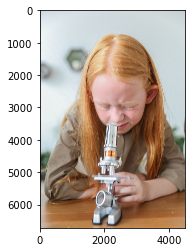

In [4]:
plt.imshow(img1)

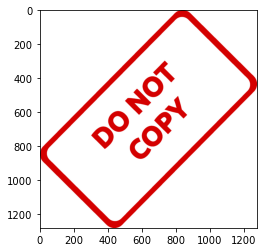

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(6720, 4480, 3)

In [7]:
img2.shape

(1280, 1277, 3)

In [8]:
# BLENDING IMAGES OF THE SAME SIZE

In [9]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

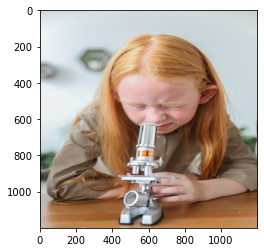

In [10]:
plt.imshow(img1)

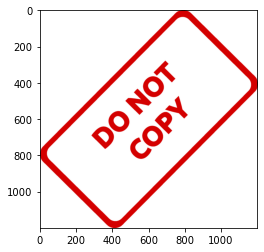

In [11]:
plt.imshow(img2)

In [16]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.1,gamma=10)

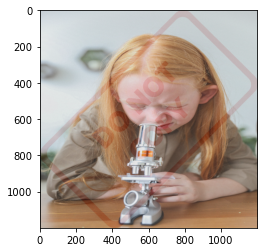

In [17]:
plt.imshow(blended)

In [18]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGE IMAGE (NO BLENDING)
# Numpy reassignment

In [20]:
img1 = cv2.imread('../numpy_images/pexels-monstera-5063470.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../numpy_images/do-not-copy-160137_1280-1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [21]:
img2 = cv2.resize(img2,(600,600))

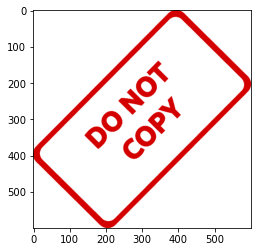

In [22]:
plt.imshow(img2)

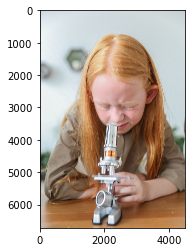

In [23]:
plt.imshow(img1)

In [24]:
large_img = img1
small_img = img2

In [25]:
x_offset = 0
y_offset = 0

In [26]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [27]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

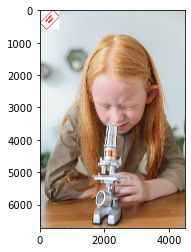

In [28]:
plt.imshow(large_img)

In [19]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [4]:
img1 = cv2.imread('../numpy_images/pexels-monstera-5063470.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../numpy_images/do-not-copy-160137_1280-1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [5]:
img2 = cv2.resize(img2, (1500,1500))

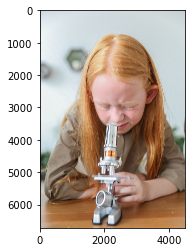

In [6]:
plt.imshow(img1)

In [7]:
img1.shape

(6720, 4480, 3)

In [8]:
x_offset = 4480 - 1500
y_offset = 6720 - 1500

In [9]:
img2.shape

(1500, 1500, 3)

In [10]:
rows,cols,channels = img2.shape

In [11]:
rows

1500

In [12]:
cols

1500

In [13]:
roi = img1[y_offset:6720,x_offset:4480]

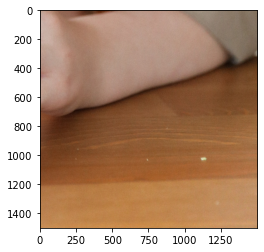

In [14]:
plt.imshow(roi)

In [15]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

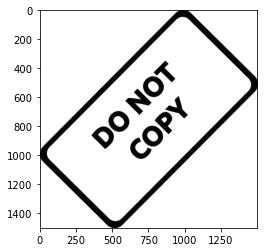

In [18]:
plt.imshow(img2gray, cmap='gray')

In [19]:
mask_inv = cv2.bitwise_not(img2gray)

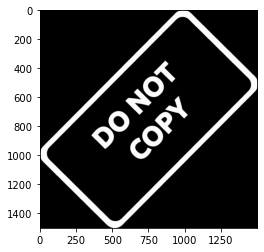

In [20]:
plt.imshow(mask_inv, cmap='gray')

In [21]:
mask_inv.shape

(1500, 1500)

In [39]:
mask_inv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
import numpy as np

In [24]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [25]:
white_background.shape

(1500, 1500, 3)

In [26]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
# white_background

In [28]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [29]:
bk.shape

(1500, 1500, 3)

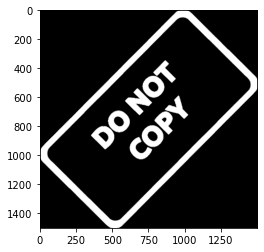

In [30]:
plt.imshow(bk)

In [31]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

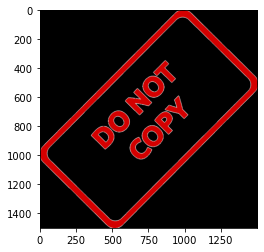

In [32]:
plt.imshow(fg)

In [33]:
final_roi = cv2.bitwise_or(roi,fg)

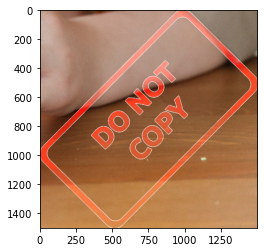

In [34]:
plt.imshow(final_roi)

In [35]:
large_img = img1
small_img = final_roi

In [36]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

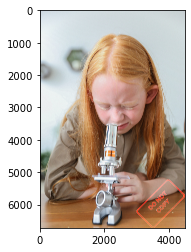

In [37]:
plt.imshow(large_img)